In [10]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np
from sklearn.metrics import adjusted_rand_score, silhouette_score

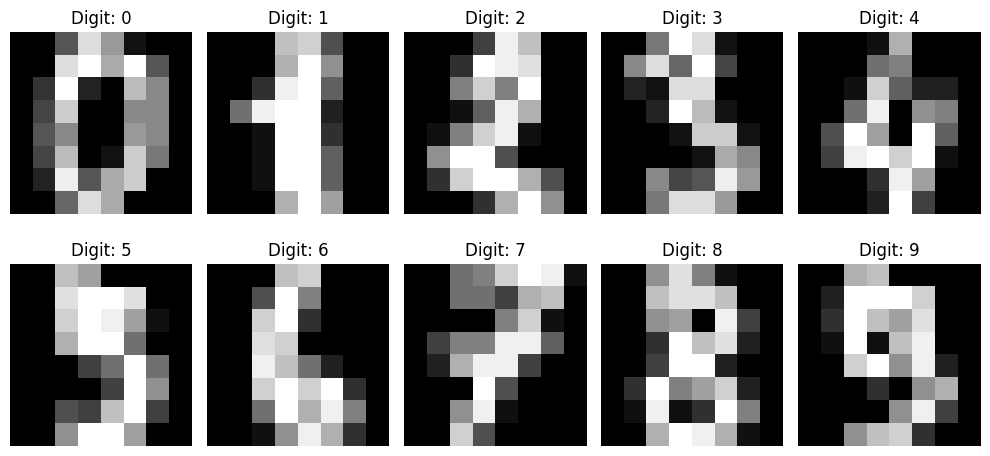

{'Data shape': (1797, 64),
 'Target shape': (1797,),
 'Images shape': (1797, 8, 8),
 'Number of unique targets': 10}

In [2]:
# Load the digits dataset
digits = load_digits()

# Explore the structure of the dataset
data_info = {
    "Data shape": digits.data.shape,
    "Target shape": digits.target.shape,
    "Images shape": digits.images.shape,
    "Number of unique targets": len(set(digits.target))
}

# Plot at least one image for each digit
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    index = list(digits.target).index(i)
    axes[i].imshow(digits.images[index], cmap='gray')
    axes[i].set_title(f'Digit: {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

data_info

## Preprocessing

In [4]:
# Check the current range of data values
data_min, data_max = digits.data.min(), digits.data.max()

# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(digits.data)

# Check the range of the scaled data
scaled_data_min, scaled_data_max = scaled_data.min(), scaled_data.max()

preprocessing_info = {
    "Original data min value": data_min,
    "Original data max value": data_max,
    "Scaled data min value": scaled_data_min,
    "Scaled data max value": scaled_data_max
}

preprocessing_info


{'Original data min value': 0.0,
 'Original data max value': 16.0,
 'Scaled data min value': -3.0125999462748765,
 'Scaled data max value': 42.379240200834595}

## K-means clustering

In [6]:
# Apply KMeans algorithm to create clusters
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Create a DataFrame to show the cluster assignments for each digit
import pandas as pd

cluster_results = pd.DataFrame({'Digit': digits.target, 'Cluster': clusters})

# Display the cluster assignments
cluster_results.head(20)


,Digit,Cluster
0,0,5
1,1,9
2,2,9
3,3,7
4,4,2
5,5,7
6,6,4
7,7,3
8,8,9
9,9,7


## AGNES clustering

In [8]:


# Apply Hierarchical Clustering algorithm to create clusters
hierarchical = AgglomerativeClustering(n_clusters=10)
hierarchical_clusters = hierarchical.fit_predict(scaled_data)

# Create a DataFrame to show the cluster assignments for each digit
hierarchical_cluster_results = pd.DataFrame({'Digit': digits.target, 'Cluster': hierarchical_clusters})

# Display the cluster assignments
hierarchical_cluster_results.head(20)


,Digit,Cluster
0,0,5
1,1,1
2,2,1
3,3,4
4,4,8
5,5,4
6,6,6
7,7,9
8,8,1
9,9,4


## Model Evaluation

In [11]:
# Evaluate the quality of the models
kmeans_ari = adjusted_rand_score(digits.target, clusters)
kmeans_silhouette = silhouette_score(scaled_data, clusters)

hierarchical_ari = adjusted_rand_score(digits.target, hierarchical_clusters)
hierarchical_silhouette = silhouette_score(scaled_data, hierarchical_clusters)

evaluation_results = {
    "KMeans Adjusted Rand Index": kmeans_ari,
    "KMeans Silhouette Score": kmeans_silhouette,
    "Hierarchical Adjusted Rand Index": hierarchical_ari,
    "Hierarchical Silhouette Score": hierarchical_silhouette
}

evaluation_results

{'KMeans Adjusted Rand Index': 0.5305122615593327,
 'KMeans Silhouette Score': 0.13558208876901615,
 'Hierarchical Adjusted Rand Index': 0.6643458356002894,
 'Hierarchical Silhouette Score': 0.12532527779196986}

## K-means assignment

In [12]:
from collections import Counter

# Find the majority label for each cluster in KMeans
kmeans_labels = {}
for cluster in range(10):
    labels = digits.target[clusters == cluster]
    majority_label = Counter(labels).most_common(1)[0][0]
    kmeans_labels[cluster] = majority_label

# Print the assigned labels for KMeans clusters
print("KMeans Cluster Labels:", kmeans_labels)


KMeans Cluster Labels: {0: 7, 1: 5, 2: 4, 3: 7, 4: 6, 5: 0, 6: 2, 7: 3, 8: 4, 9: 8}


## AGNES assignment

In [13]:
# Find the majority label for each cluster in Hierarchical Clustering
hierarchical_labels = {}
for cluster in range(10):
    labels = digits.target[hierarchical_clusters == cluster]
    majority_label = Counter(labels).most_common(1)[0][0]
    hierarchical_labels[cluster] = majority_label

# Print the assigned labels for Hierarchical clusters
print("Hierarchical Cluster Labels:", hierarchical_labels)


Hierarchical Cluster Labels: {0: 5, 1: 8, 2: 2, 3: 2, 4: 3, 5: 0, 6: 6, 7: 7, 8: 4, 9: 7}
